# DATA2001 - SA2 Greater Sydney Analysis
This report contains a calcualted score measuring how 'bustling' areas of greater Sydney are, as well as an evaluation of said metric.

## Dataset Descriptions
#### Business Dataset:
Data collected the Australian Bureau of Statistics Business Registrar (ABSBR) on all actively trading businesses in the Australian Market excluding banks, governments and not-for-profits. The data was collected either quarterly or anually from the Australian Business Registrar and business data from the Australian Taxation Office. Data was categorised by SA2 regions and LGA's. The dataset includes the industry name, industry code, then a count divided into turnover size then a given total count. This data is available under the creative commons license as can be seen [on their website]('https://www.abs.gov.au/statistics/economy/business-indicators/counts-australian-businesses-including-entries-and-exits/latest-release#data-downloads')

To clean the business dataset all businesses that weren't either food and accommodation or retail trade were filtered out, as these two industries were determined to be the best indicators of the 'bustling' metric. Other unnecessary columns were also removed that weren't important to the investigation, which included all colums with turnover ranges and industry codes. Null values were also checked for and rows with unknown locations were removed as they were unsuitable for our intended use.
#### Stops Dataset:
Data about the public transit stops in NSW. This dataset was created and maintained by NSW Transport and contains data last updated in 2024. The data contained after cleaning is the stop ID, the stop name and the coordinates of the stop. The data included is both train and bus stops and is in General Transit Feed Specification (GTFS) format.This data is available via [opendata transport]('https://opendata.transport.nsw.gov.au/dataset/timetables-complete-gtfs') and is available for use under the [Creative Commons License]('https://opendefinition.org/licenses/cc-by/').

To clean the stops dataset columns that were unnecessary for the project were removed as the only thing we are interested in obtaining from this dataset is the amount of stops in each region, hence only including stop_id, stop_name and coordinates. The coordinates column was created by turning the latitude and longitude columns into a singular point value utilising geopandas and geoalchemy2.
#### Polling Dataset
Data about polling places available during the 2019 election. This dataset was collated and managed by the Australian Electoral Commission. It details polling locations as well as premise details. The dataset includes each polling places Federal ID, State, division name and ID, geometry, latitude and longitude, polling place name and ID, Premise address, name , state, suburb and postcode. The data was sourced from the [Australian Spatial Intellignce Network]('https://data.aurin.org.au/dataset/au-govt-aec-aec-federal-election-polling-places-2019-na'). This data is available for use under  the [creative commons license]('https://creativecommons.org/licenses/by/4.0/').
#### School Catchments Dataset
This dataset contains information about geographical regions that dictate  which students must attend specific schools. It divides schools into primary, secondary and planned future schools. The dataset was last updated in 2024 and was published and managed by NSW Department of education. These geographical regions will be utilised in conjuction with the population dataset to count school catchment areas per 1000 young people. This data is available for use under the [creative commons license]('https://creativecommons.org/licenses/by/4.0/'). The dataset includes geometric data, the catchment types, school name and the schooling years the school provides.
#### Income dataset
The income dataset provides information about the ammount of earners and their median and mean income by SA2 region. This dataset will be useful in comparing to our metric to view how well it correlates with income which is strong metric for calculating [how bustling an area is]('https://fastercapital.com/content/Median-Income--A-Key-Indicator-of-Economic-Well-being.html').
#### Population
The population dataset contains population data categorised by age groups and with a given total. Population data is given for SA2 areas and provides both SA2 Names and Id's. This data will be particularly useful for calculating the population density of school catchments and industry businesses per 1000 people. This data is made of estimates utilised for per capita calculations.

#### SA2 Regions
SA2 geographic regions were utilised to define the Greater Sydney areas. These groups were taken from the [Australian Beurau of Statistics website]('https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files'). These boundaries will be useful in defining groups and categorising data to applty our bustling metrics over the different SA2 groups in Greater Sydney.

## Method

Firstly, we calculated the z-scores of the businesses, stops, polls and schools schemas in order to create a sigmoid function that serves as the best reflection of how "bustling" an area is. 

#### Business Table
For the business table, we chose to focus on the industries of Retail and Trade, as well as Accomodation and Food Services. We found these industries were the most useful in determing how bustling an area is, as Retail and Trade reflects an active community where businesses have chosen to locate themselves for the greatest potential for sales. In a non-bustling area, businesses in this industry would not be able to exist, as a lack of spending within the community would eventually force them to close down. This has been observed globally, as vibrant cities such as New York have a plethora of businesses in this industry, while on the opposite end of the spectrum, places that are not as bustling lack in this industry. Additionally, the Accomodation and Food Services also reflects a bustling area but in a different way, as this industry relies heavily on sectors such as tourism which impact an area's "bustlingness" in another way to Retail and Trade. For these reasons, we chose these industries to focus on as a indicator of how bustling an area is. Additionally, calculating the z-score as based on the total number of businesses per 1000 people standardizes this metric, allowing smaller but more bustling areas to outperform areas that simply have a high density of businesses which no residents, or a high density of businesses due to a high density of residents. This was caluculated using the Population table, where we simply joining the businees and populatin tables on sa2_code and taking the total people from each code to calculate in tandem wiht the total businesses in each sa2 region.

#### Stops Table
For the stops table, we calculated the total number of stops in each sa2 region using the COUNT function in SQL, then used ST_Contains with the geometry columnms of both the sa2 table and the stops table to ensure that the stops were within a specific sa2 region that we could then correlate a total number of stops to. This allowed us to find a total number of stops in each sa2 region, as we saw the need for public transport as a great metric for measuring how bustling an area is, as public transport is typically observed in bustling communities. 

#### Polling Table
For the polling table, similarly to the stops region, we calculated the total number of polling locations in a given sa2 region using ST_Contains with the geometry column of both the sa2 table and the polling table. This allowed us to ensure the coordinates of the polling locations were within a specific sa2 region. This is also a great metric to meaure how bustling an area is as TODO

#### Schools Table(s)
For the schools section, we were given three different tables in the form of shapefiles as they included spatial data. They consisted of primary, secondary and future schools. For our purposes, we simply used all three to find the total area of catchment areas in a given sa2 region, which we then rationalised to per 1000 'young people', where young people are defined as those between the ages of 0-19.

# Results Analysis

As can be seen below, 

## Analysis



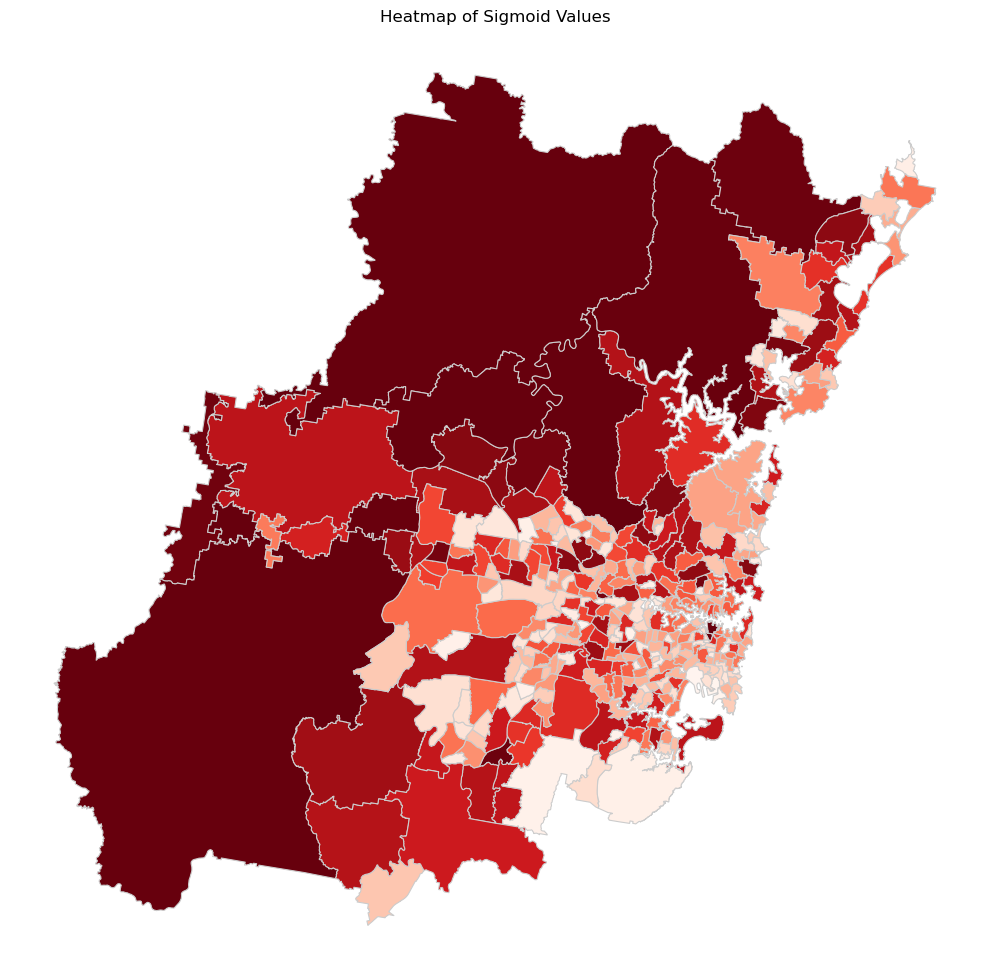

## Discussion